### **Tensorflow Version Check**

In [1]:
# 텐서플로 2.x 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print('tf.__version__ = {}' .format(tf.__version__))

tf.__version__ = 2.1.0


### **지역별 인구증가율과 고령인구비율 시각화**

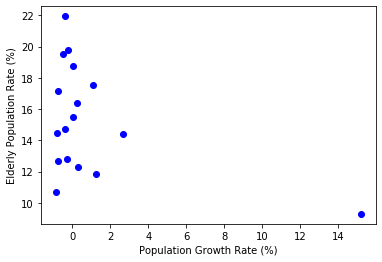

In [3]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **지역별 인구증가율과 고령인구비율 시각화(Outlier 제거)**

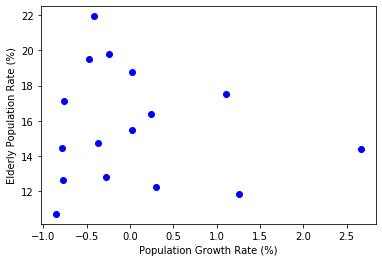

In [4]:
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **최소제곱법을 이용한 회귀선 구하기**

a : -0.41696972205601757 b : 15.668665264060529


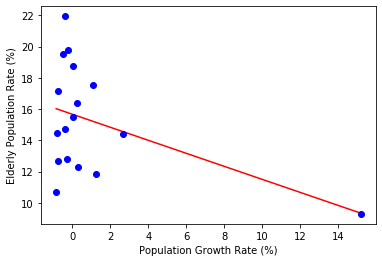

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균 계산
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 기울기와 절편 구하기
a = sum([(y-y_bar) * (x-x_bar) for y,x in list(zip(Y,X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a :', a, 'b :', b)

# 회귀선 데이터 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 회귀선 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a : -0.355834147915461 b : 15.669317743971302


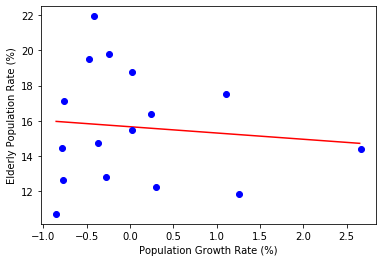

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균 계산
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 기울기와 절편 구하기
a = sum([(y-y_bar) * (x-x_bar) for y,x in list(zip(Y,X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a :', a, 'b :', b)

# 회귀선 데이터 구하기
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 회귀선 그리기
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **텐서플로를 이용해 회귀선 구하기**

99 a : 0.115123786 b : 6.8009624 loss : 88.246086
199 a : -0.12194952 b : 11.270894 loss : 29.082058
299 a : -0.25942492 b : 13.856089 loss : 13.060978
399 a : -0.32326552 b : 15.056777 loss : 10.15514
499 a : -0.34686267 b : 15.500586 loss : 9.809207
599 a : -0.35382774 b : 15.631586 loss : 9.782224
699 a : -0.3554728 b : 15.662524 loss : 9.780849
799 a : -0.3557824 b : 15.6683445 loss : 9.780805
899 a : -0.35582808 b : 15.669209 loss : 9.780804
999 a : -0.35583317 b : 15.669302 loss : 9.780804


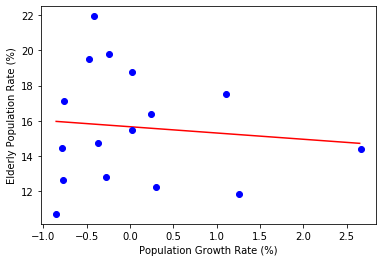

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b를 랜덤으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss() : 
  y_pred = a * X + b
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

# 옵티마이저
optimizer = tf.optimizers.Adam(lr=0.07)

for i in range(1000) : 
  # 잔차의 제곱의 평균을 최소화
  optimizer.minimize(compute_loss, var_list=[a,b])

  if i % 100 == 99 : 
    print(i, 'a :', a.numpy(), 'b :', b.numpy(), 'loss :', compute_loss().numpy())

# 회귀직선
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **다항 회귀**

99 a : 3.8310676 b : -5.4991612 loss : 65.72551
199 a : 2.6962097 b : -4.473582 loss : 30.092234
299 a : 1.2138495 b : -2.2350087 loss : 15.510575
399 a : 0.2799112 b : -0.81086797 loss : 10.823788
499 a : -0.21251504 b : -0.06033755 loss : 9.693944
599 a : -0.43592975 b : 0.28014958 loss : 9.487886
699 a : -0.5234893 b : 0.41359034 loss : 9.459358
799 a : -0.55317163 b : 0.4588264 loss : 9.456362
899 a : -0.561867 b : 0.4720772 loss : 9.456125
999 a : -0.56405854 b : 0.47541714 loss : 9.456112


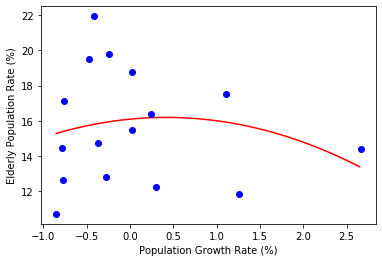

In [8]:
# Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# Data
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b,c 를 Random으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss() : 
  y_pred = a * X * X + b * X + c
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

# 옵티마이저
optimizer = tf.keras.optimizers.Adam(lr=0.07)

# 훈련
for i in range(1000) : 

  # 잔차의 제곱의 평균을 최소화
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  # 결과 출력
  if i % 100 == 99 : 
    print(i, 'a :', a.numpy(), 'b :', b.numpy(), 'loss :', compute_loss().numpy())

# 회귀선
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a : -1.3183032 b : 7.2502384 loss : 169.54071
199 a : -2.8843186 b : 11.982594 loss : 146.3894
299 a : -4.1662583 b : 15.1851845 loss : 137.98643
399 a : -5.0315886 b : 17.187141 loss : 135.09195
499 a : -5.524886 b : 18.3089 loss : 134.293
599 a : -5.768629 b : 18.862011 loss : 134.12085
699 a : -5.8740544 b : 19.101229 loss : 134.09186
799 a : -5.914083 b : 19.192057 loss : 134.08806
899 a : -5.927412 b : 19.222301 loss : 134.08768
999 a : -5.9312944 b : 19.231113 loss : 134.08765


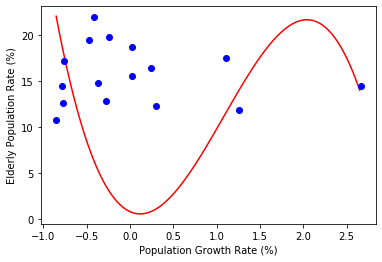

In [9]:
# Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# Data
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a,b,c,d 를 Random으로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수
def compute_loss() : 
  y_pred = a * X * X * X + b * X * X + c * X * d
  loss = tf.reduce_mean((Y - y_pred) ** 2)
  return loss

# 옵티마이저
optimizer = tf.keras.optimizers.Adam(lr=0.07)

# 훈련
for i in range(1000) : 

  # 잔차의 제곱의 평균을 최소화
  optimizer.minimize(compute_loss, var_list=[a,b,c])

  # 결과 출력
  if i % 100 == 99 : 
    print(i, 'a :', a.numpy(), 'b :', b.numpy(), 'loss :', compute_loss().numpy())

# 회귀선
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **딥러닝 네트워크를 이용한 회귀**

In [10]:
# Library
import tensorflow as tf
import numpy as np

# Data
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# Model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
                             tf.keras.layers.Dense(units=1)])

# Compile
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 학습
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 13ms/sample - loss: 254.9225
Epoch 2/10
16/16 [==============================] - 0s 539us/sample - loss: 100.4729
Epoch 3/10
16/16 [==============================] - 0s 574us/sample - loss: 10.3581
Epoch 4/10
16/16 [==============================] - 0s 443us/sample - loss: 9.7582
Epoch 5/10
16/16 [==============================] - 0s 375us/sample - loss: 9.7118
Epoch 6/10
16/16 [==============================] - 0s 398us/sample - loss: 9.6952
Epoch 7/10
16/16 [==============================] - 0s 347us/sample - loss: 9.6852
Epoch 8/10
16/16 [==============================] - 0s 332us/sample - loss: 9.6790
Epoch 9/10
16/16 [==============================] - 0s 425us/sample - loss: 9.6749
Epoch 10/10
16/16 [==============================] - 0s 365us/sample - loss: 9.6720


In [12]:
# 예측
model.predict(X)

array([[15.684254],
       [15.910763],
       [15.220041],
       [15.765434],
       [15.312195],
       [15.70396 ],
       [15.828703],
       [15.87023 ],
       [15.909702],
       [15.853472],
       [15.917749],
       [15.860407],
       [15.83473 ],
       [15.768082],
       [15.908628],
       [14.061178]], dtype=float32)

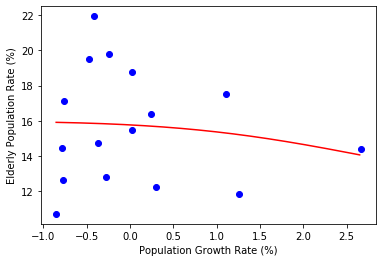

In [13]:
# Library
import matplotlib.pyplot as plt

# Regression Line
line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

# Graph
plt.plot(line_x, line_y, 'r-')
plt.plot(X, Y, 'bo')

plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

### **보스터 주택 가격 회귀 문제**

=== Dataset Size ===
404 102

=== Dataset Shape ===
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2

=== Dataset Shape (Normalization) ===
[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)      

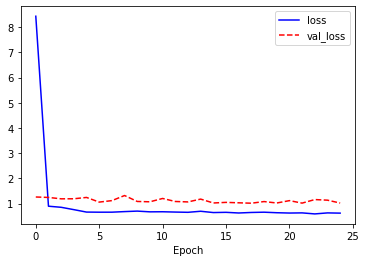

In [14]:
# Dataset
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

# Dataset Size
print('=== Dataset Size ===')
print(len(train_X), len(test_X), end='\n\n')

# Dataset Shape
print('=== Dataset Shape ===')
print(train_X[0])
print(train_Y[0], end='\n\n')

# Data Normalization
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std
y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= x_mean
test_Y /= x_std

print('=== Dataset Shape (Normalization) ===')
print(train_X[0])
print(train_Y[0], end='\n\n')

# Model Build
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(units=39, activation='relu'),
                             tf.keras.layers.Dense(units=26, activation='relu'),
                             tf.keras.layers.Dense(units=1)
])

# Model Compile
model.compile(optimizer=tf.keras.optimizers.Adam(lr=.07), loss='mse')
model.summary()

# Model Learning
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

# loss 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 75us/sample - loss: 0.3503


0.3502556237519956

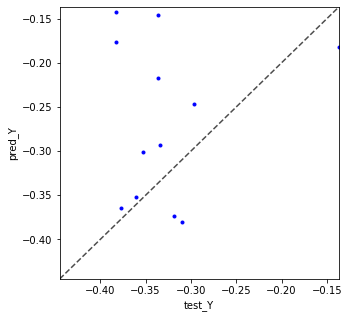

In [16]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [17]:
# 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 1.9490 - val_loss: 1.1469
Epoch 2/25
303/303 [==============================] - 0s 121us/sample - loss: 0.9500 - val_loss: 1.0955
Epoch 3/25
303/303 [==============================] - 0s 115us/sample - loss: 0.7579 - val_loss: 1.1581
Epoch 4/25
303/303 [==============================] - 0s 108us/sample - loss: 0.7240 - val_loss: 1.0283
Epoch 5/25
303/303 [==============================] - 0s 104us/sample - loss: 0.6802 - val_loss: 1.0909
Epoch 6/25
303/303 [==============================] - 0s 101us/sample - loss: 0.6706 - val_loss: 1.1651
Epoch 7/25
303/303 [==============================] - 0s 121us/sample - loss: 0.6806 - val_loss: 1.1172
